# Import Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "Credit card transactions - Project - 2.csv"
df = pd.read_csv(file_path)
df.info(), 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


(None,)

In [3]:
 df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",05-May-15,Gold,Bills,F,171574


In [4]:
df.drop(columns=['index'], inplace=True)
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df['Month'] = df['Date'].dt.to_period('M').astype(str)
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)
df['Weekday'] = df['Date'].dt.dayofweek

# Q1: Top 5 Cities with Highest Credit Card Spend & Their % Contribution

In [5]:
city_spend = df.groupby('City')['Amount'].sum().sort_values(ascending=False).head(5)
total_spend = df['Amount'].sum()
city_percent = (city_spend / total_spend * 100).round(2)
top5_cities = pd.DataFrame({
    'Total Spend': city_spend,
    '% of Total Spend': city_percent
})

top5_cities.reset_index(inplace=True)
top5_cities

,City,Total Spend,% of Total Spend
0,"Greater Mumbai, India",576751476,14.15
1,"Bengaluru, India",572326739,14.05
2,"Ahmedabad, India",567794310,13.93
3,"Delhi, India",556929212,13.67
4,"Kolkata, India",115466943,2.83


C:\Users\srj15\AppData\Local\Temp\ipykernel_10508\2883084677.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Spend', y='City', data=top5_cities, palette='mako')


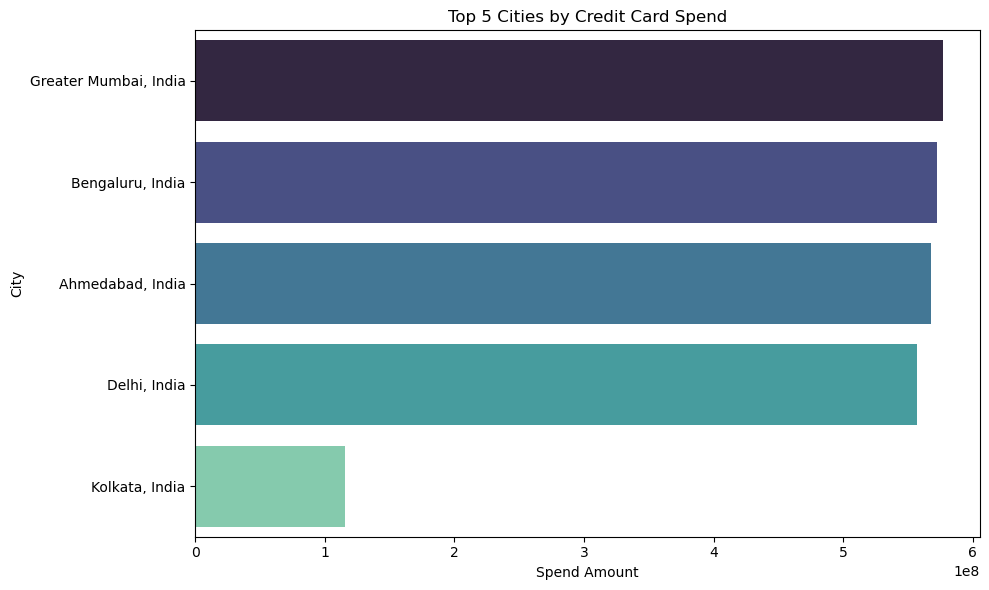

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(x='Total Spend', y='City', data=top5_cities, palette='mako')
plt.title('Top 5 Cities by Credit Card Spend')
plt.xlabel('Spend Amount')
plt.ylabel('City')
plt.tight_layout()
plt.show()

# Q2: Month with Highest Spends for Each Card Type

In [7]:
card_month_spend = df.groupby(['Card Type', 'Month'])['Amount'].sum().reset_index()
q2_result = card_month_spend.sort_values(['Card Type', 'Amount'], ascending=[True, False]).drop_duplicates('Card Type')

In [8]:
q2_result

,Card Type,Month,Amount
15,Gold,2015-01,55455064
30,Platinum,2014-08,57936507
42,Signature,2013-12,58799522
77,Silver,2015-03,59723549


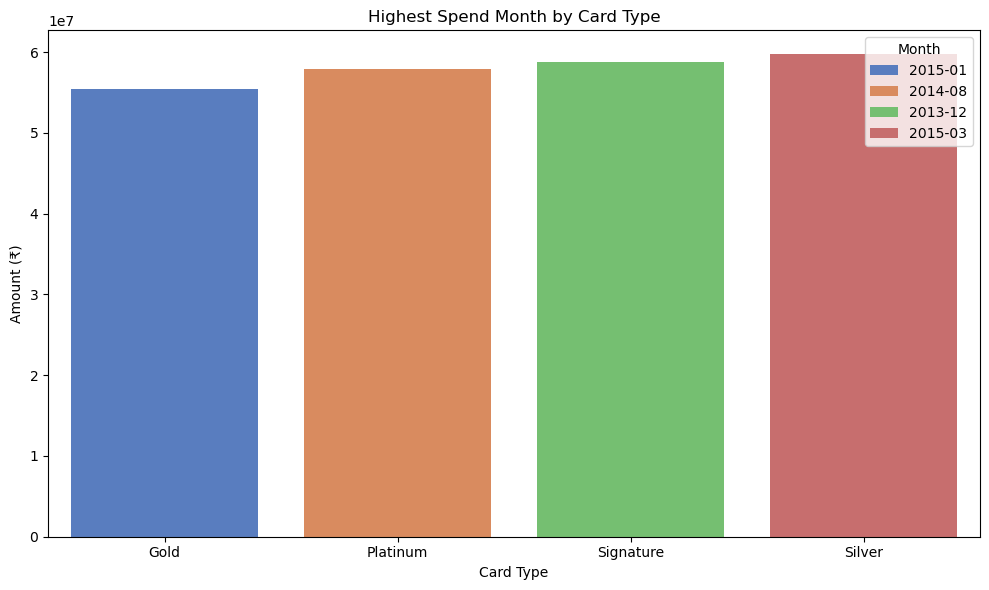

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x='Card Type', y='Amount', hue='Month', data=q2_result, palette='muted')
plt.title('Highest Spend Month by Card Type')
plt.ylabel('Amount (₹)')
plt.tight_layout()
plt.show()

# Q3: First Month Where Each Card Type Crossed ₹10,00,000

In [10]:
card_month_cumsum = card_month_spend.copy()
card_month_cumsum['Cumulative'] = card_month_cumsum.groupby('Card Type')['Amount'].cumsum()

In [11]:
q3_result = card_month_cumsum[card_month_cumsum['Cumulative'] >= 1_000_000].drop_duplicates('Card Type')
q3_result[['Card Type', 'Month', 'Cumulative']]

,Card Type,Month,Cumulative
0,Gold,2013-10,48207082
20,Platinum,2013-10,50634540
40,Signature,2013-10,57196872
60,Silver,2013-10,51321598


C:\Users\srj15\AppData\Local\Temp\ipykernel_10508\449131691.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Card Type', y='Cumulative', data=q3_result, palette='pastel')


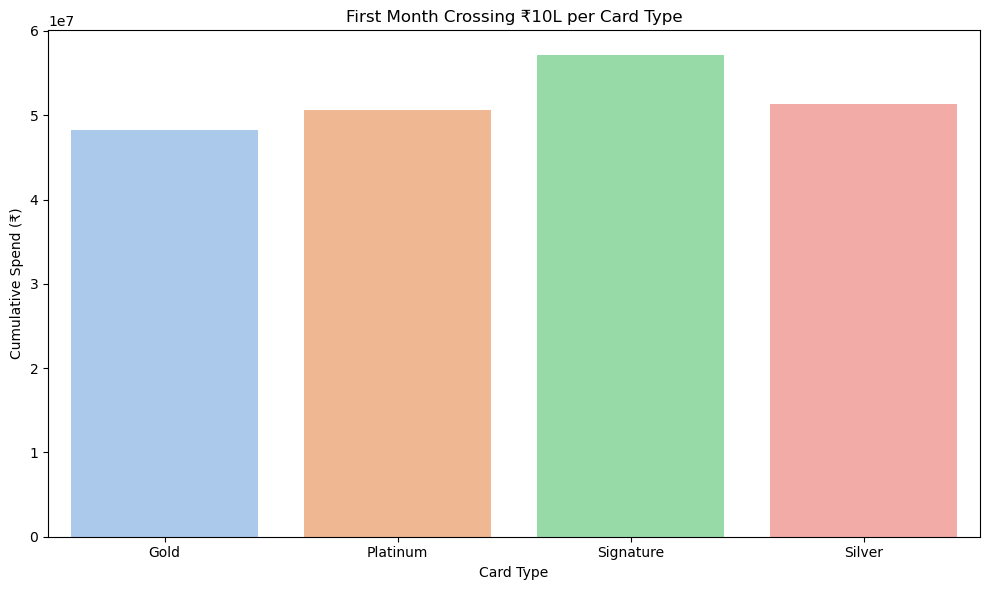

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x='Card Type', y='Cumulative', data=q3_result, palette='pastel')
plt.title('First Month Crossing ₹10L per Card Type')
plt.ylabel('Cumulative Spend (₹)')
plt.tight_layout()
plt.show()

# Q4: City with Lowest Gold Card Spend %

In [13]:
city_total = df.groupby('City')['Amount'].sum()
gold_df = df[df['Card Type'] == 'Gold']
gold_city = gold_df.groupby('City')['Amount'].sum()
gold_percent = (gold_city / city_total * 100).dropna().round(2)
q4_result = gold_percent.sort_values().head(1).reset_index()
q4_result.columns = ['City', 'Gold Spend %']

In [14]:
q4_result

,City,Gold Spend %
0,"Dhamtari, India",0.33


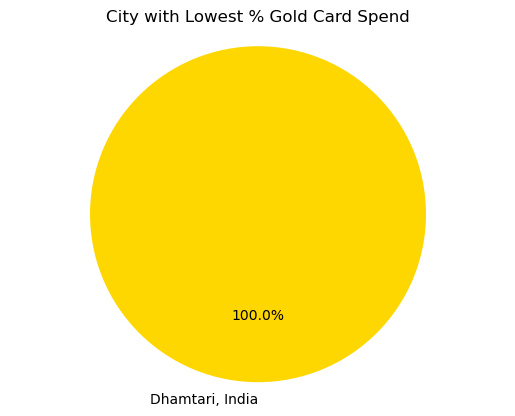

In [15]:
plt.pie(q4_result['Gold Spend %'], labels=q4_result['City'], autopct='%1.1f%%', startangle=90, colors=['gold'])
plt.title('City with Lowest % Gold Card Spend')
plt.axis('equal')
plt.show()

# Q5: Highest & Lowest Expense Type per City

In [16]:
city_exp = df.groupby(['City', 'Exp Type'])['Amount'].sum().reset_index()
q5_high = city_exp.sort_values(['City', 'Amount'], ascending=[True, False]).drop_duplicates('City')
q5_low = city_exp.sort_values(['City', 'Amount'], ascending=[True, True]).drop_duplicates('City')
q5_high.head(), q5_low.head()

(                City Exp Type  Amount
 3    Achalpur, India  Grocery  788403
 4    Adilabad, India    Bills  868039
 9   Adityapur, India     Food  296944
 12      Adoni, India    Bills  634273
 20      Adoor, India     Fuel  552070,
                 City       Exp Type  Amount
 1    Achalpur, India  Entertainment   55347
 6    Adilabad, India           Food   80193
 11  Adityapur, India        Grocery  180339
 13      Adoni, India  Entertainment  116961
 17      Adoor, India          Bills    6536)

In [17]:
q5_combined = q5_high.merge(q5_low, on='City', suffixes=('_Highest', '_Lowest'))
q5_combined.head()

,City,Exp Type_Highest,Amount_Highest,Exp Type_Lowest,Amount_Lowest
0,"Achalpur, India",Grocery,788403,Entertainment,55347
1,"Adilabad, India",Bills,868039,Food,80193
2,"Adityapur, India",Food,296944,Grocery,180339
3,"Adoni, India",Bills,634273,Entertainment,116961
4,"Adoor, India",Fuel,552070,Bills,6536


# Q6: % of Spend by Females for Each Expense Type

In [18]:
total_by_exp = df.groupby('Exp Type')['Amount'].sum()
female_by_exp = df[df['Gender'] == 'F'].groupby('Exp Type')['Amount'].sum()
female_percent = (female_by_exp / total_by_exp * 100).dropna().round(2)
q6_result = female_percent.reset_index()
q6_result.columns = ['Expense Type', 'Female Spend %']

In [19]:
q6_result

,Expense Type,Female Spend %
0,Bills,63.95
1,Entertainment,49.37
2,Food,54.91
3,Fuel,49.71
4,Grocery,50.91
5,Travel,51.13


C:\Users\srj15\AppData\Local\Temp\ipykernel_10508\2371964107.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Female Spend %', y='Expense Type', data=q6_result.sort_values('Female Spend %', ascending=False), palette='coolwarm')


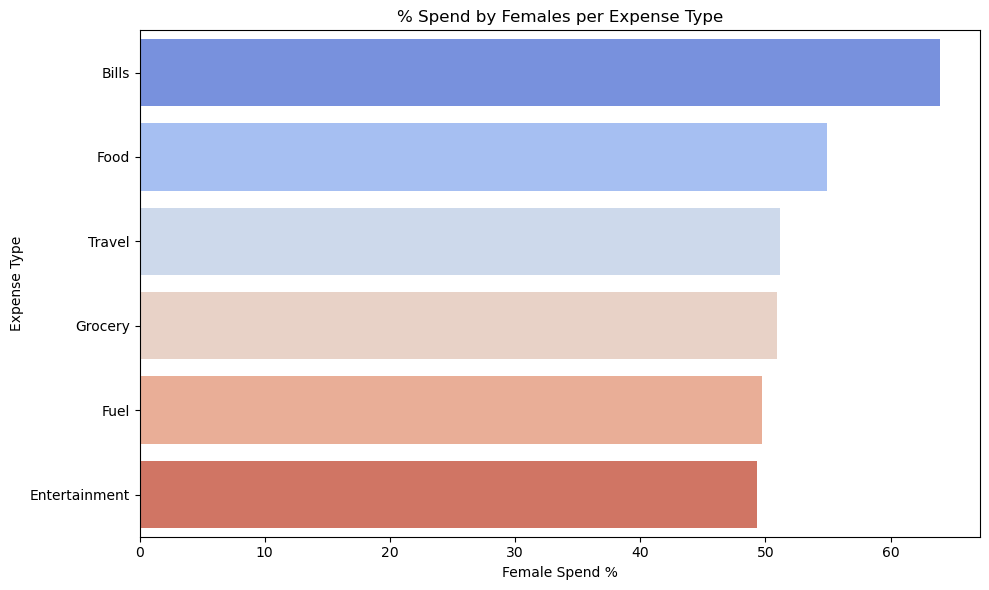

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x='Female Spend %', y='Expense Type', data=q6_result.sort_values('Female Spend %', ascending=False), palette='coolwarm')
plt.title('% Spend by Females per Expense Type')
plt.tight_layout()
plt.show()

# Q7: Card + Expense Combo with Highest MoM Growth in Jan 2014

In [21]:
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)
combo_spend = df.groupby(['Card Type', 'Exp Type', 'YearMonth'])['Amount'].sum().reset_index()
pivot = combo_spend.pivot_table(index=['Card Type', 'Exp Type'], columns='YearMonth', values='Amount', fill_value=0)
pivot['Growth'] = pivot.get('2014-01', 0) - pivot.get('2013-12', 0)

In [22]:
q7_result = pivot['Growth'].sort_values(ascending=False).head(1)
q7_result

Card Type  Exp Type
Platinum   Grocery     4498781.0
Name: Growth, dtype: float64

# Q8: City with Highest Weekend Spend-to-Transaction Ratio

In [23]:
weekend_df = df[df['Weekday'].isin([5, 6])]
weekend_summary = weekend_df.groupby('City').agg({
    'Amount': 'sum',
    'Date': 'count'
}).rename(columns={'Date': 'Transaction Count'})
weekend_summary['Spend-to-Txn Ratio'] = (weekend_summary['Amount'] / weekend_summary['Transaction Count']).round(2)
q8_result = weekend_summary.sort_values('Spend-to-Txn Ratio', ascending=False).head(1)

In [24]:
q8_result

,Amount,Transaction Count,Spend-to-Txn Ratio
City,,,
"Sonepur, India",299905,1,299905.0


C:\Users\srj15\AppData\Local\Temp\ipykernel_10508\649277077.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Spend-to-Txn Ratio', data=top5_weekend, palette='crest')


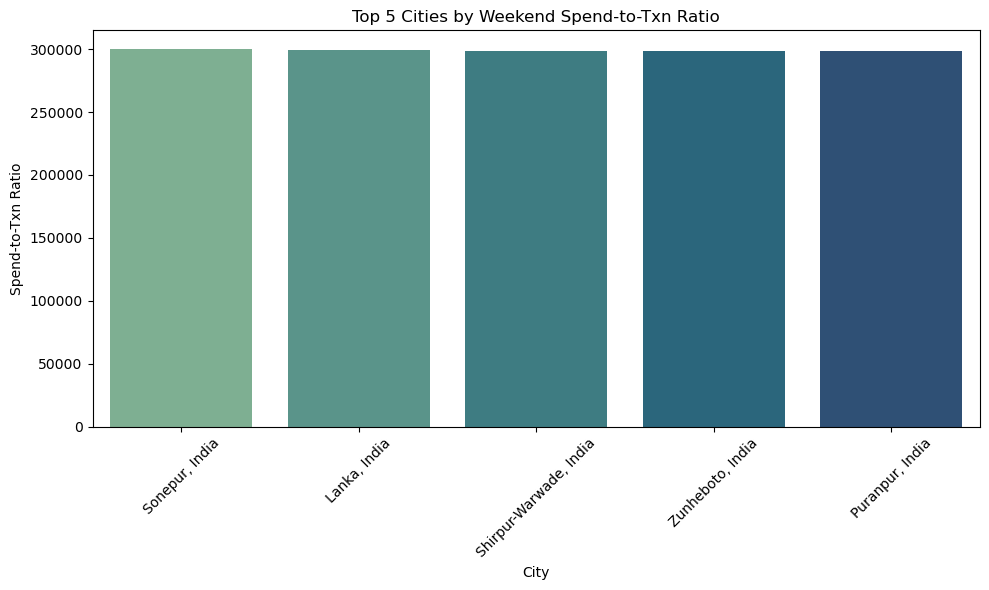

In [25]:
top5_weekend = weekend_summary.sort_values('Spend-to-Txn Ratio', ascending=False).head(5).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='City', y='Spend-to-Txn Ratio', data=top5_weekend, palette='crest')
plt.title('Top 5 Cities by Weekend Spend-to-Txn Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Q9: City That Reached 500th Transaction the Fastest

In [26]:
df_sorted = df.sort_values('Date')
city_500_dates = []
for city, group in df_sorted.groupby('City'):
    if len(group) >= 500:
        first_500 = group.iloc[:500]
        days_taken = (first_500['Date'].max() - first_500['Date'].min()).days
        city_500_dates.append((city, days_taken))

q9_result = pd.DataFrame(city_500_dates, columns=['City', 'Days Taken']).sort_values('Days Taken').head(1)

In [27]:
q9_result

,City,Days Taken
1,"Bengaluru, India",81
